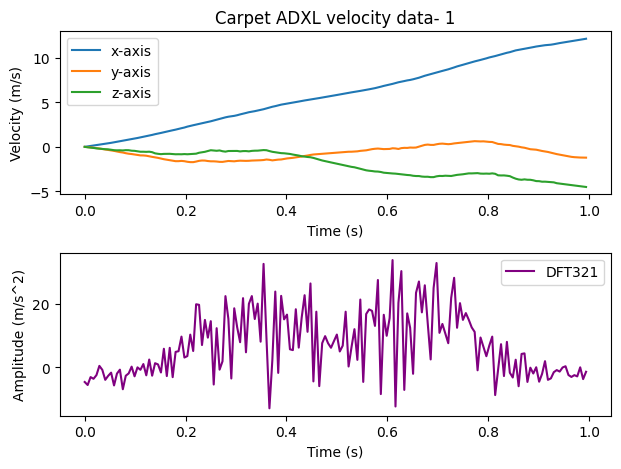

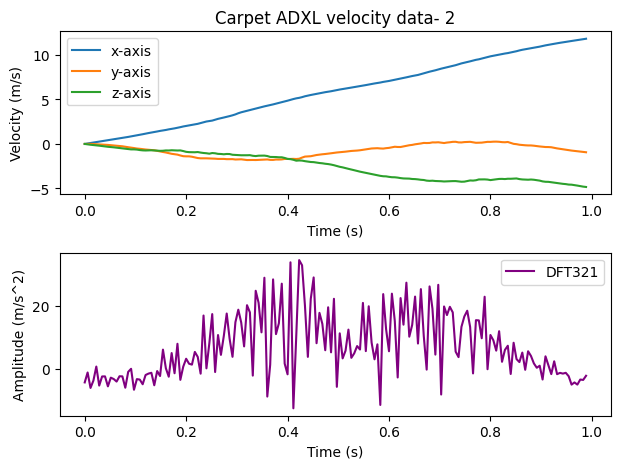

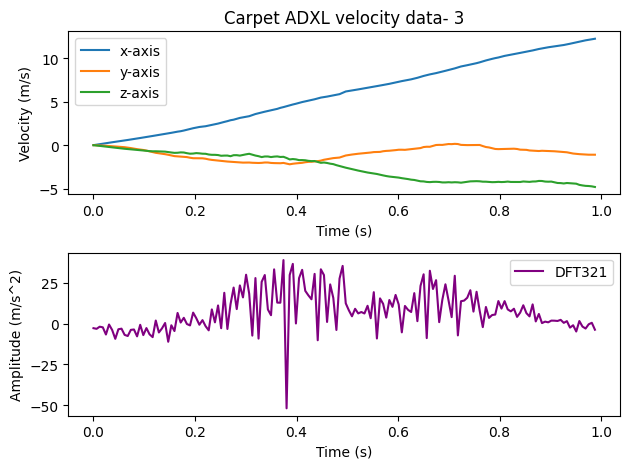

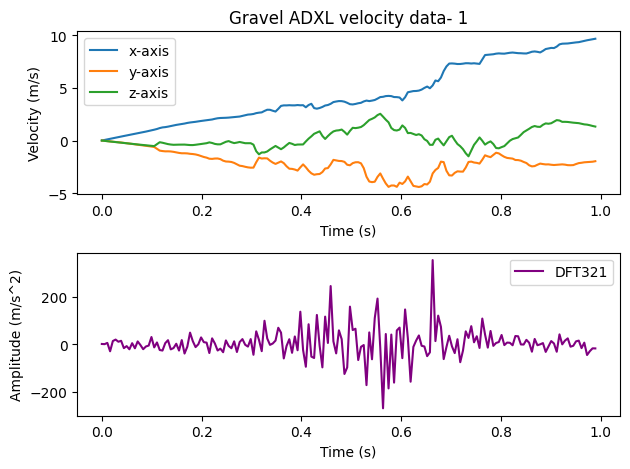

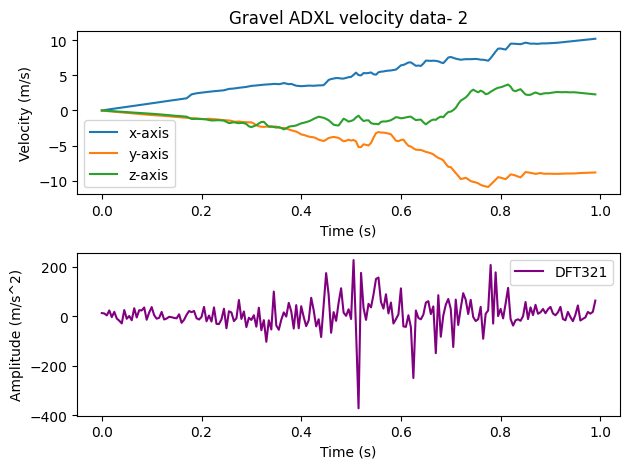

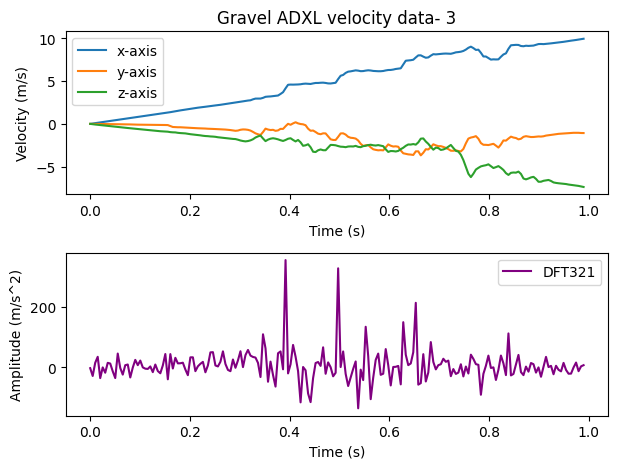

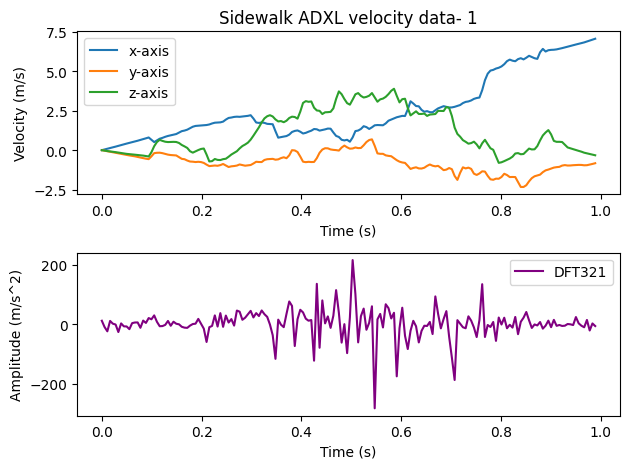

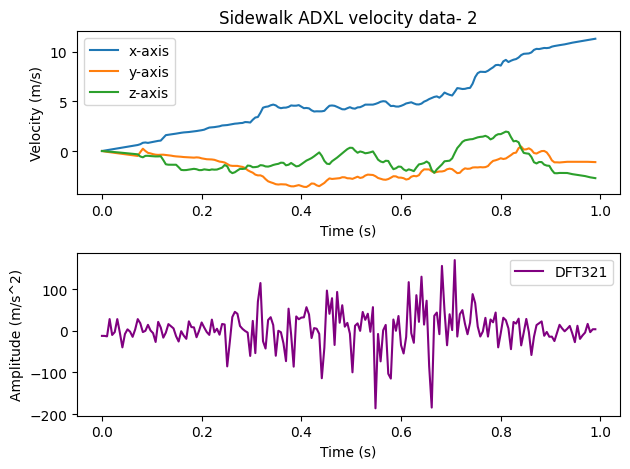

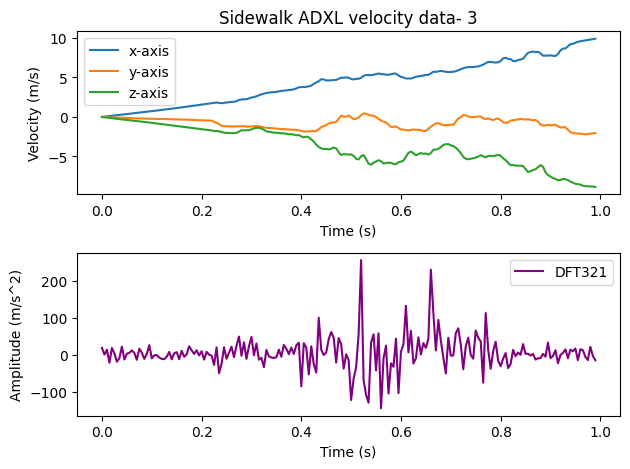

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os as os

def trimExcelFileName(excel_file_name):
    parts = excel_file_name.split("\\")
    return parts[-1].split('_')[0] 


chart_cnt=1

base_folder_path = 'D:/GEM Lab/GEMLabHCIResearch/Accelerometer and Audio data/IMU and ADXL data/Excel data and plotting program/Excel sheets/'
velocity_data_path = base_folder_path +  '/Velocity sheets'

folder_list = os.listdir(velocity_data_path)
chart_cnt=0

for list_item in folder_list:
    item_path = os.path.join(velocity_data_path, list_item)
    if os.path.isfile(item_path):
        surface_data = pd.read_excel(item_path,sheet_name=None)
        for sheet_name,data in surface_data.items():
            chart_cnt+=1
            time = data.get('Time')
                            
            velo_x = data.get('Velocity -x').values
            velo_y = data.get('Velocity -y').values
            velo_z = data.get('Velocity -z').values
            dft321_magnitude = data.get('ADXL Magnitude').values

            # Create a figure and axis object
            ax1 = plt.subplot(2, 1, 1)

            # Plot the line
            ax1.plot(time, velo_x, label ='x-axis')
            ax1.plot(time, velo_y, label ='y-axis')
            ax1.plot(time, velo_z, label ='z-axis')

            # Add labels and title
            ax1.set_xlabel('Time (s)')
            ax1.set_ylabel('Velocity (m/s)')
            ax1.legend()
            ax1.set_title(list_item.split('.')[0]+' velocity data- '+str(chart_cnt))

            ax2 = plt.subplot(2, 1, 2)
            ax2.plot(time, dft321_magnitude, label ='DFT321', color='purple')
            ax2.set_xlabel('Time (s)')
            ax2.set_ylabel('Amplitude (m/s^2)')
            ax2.legend()
            
            
            plt.tight_layout()
            # Display the plot
            plt.show() 

        chart_cnt=0